<a href="https://colab.research.google.com/github/kush450629/ME421_GROUP_A1/blob/main/Vibration/ME421_E20229_Vibrations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

E/20/229 M.J.K.Madhuwantha

## **Derivation of the Linear Operator $(H)$**

### **1. Physical Boundary Conditions**
Given the specified boundary conditions for a beam with length $L$, the system is characterized by the following constraints at its ends.

* **At $x = 0$ (Pinned End):**
    * $y(0, t) = 0$ (Zero displacement)
    * $\frac{\partial^2 y}{\partial x^2}(0, t) = 0$ (bending moment=0)
* **At $x = L$ (Free End):**
    * $\frac{\partial^2 y}{\partial x^2}(L, t) = 0$ (bending moment=0)
    * $\frac{\partial^3 y}{\partial x^3}(L, t) = 0$ (shear force=0)



### **2. Definition of the Vector Space $F$**
Consider $F$ as the infinite-dimensional vector space consisting of functions with at least four continuous derivatives on $[0, L]$. For the operator to be properly defined in this particular system, functions in $F$ must fulfill the given boundary conditions.

$$F = \{ f \in C^4[0, L] \mid f(0) = 0, f''(0) = 0, f''(L) = 0, f'''(L) = 0 \}$$

### **3. The Linear Operator $H$**
The motion of the beam is described by the partial differential equation:
$$\frac{\partial^2 y}{\partial t^2} + Hy = \frac{q(t,x)}{\rho A}$$

The linear operator $H: F \to F$ is defined by the differential expression:
$$H = \frac{EI}{\rho A} \frac{\partial^4}{\partial x^4} + \frac{P_o}{\rho A} \frac{\partial^2}{\partial x^2}$$

### **4. Simplification for $P_o = 0$**
For negligible constant axial compressive force ($P_o = 0$), the second derivative term disappears. This simplifies the operator $H$ to:

$$H = \frac{EI}{\rho A} \frac{\partial^4}{\partial x^4}$$

Replacing this in the equations of motion gives the standard form of the Euler-Bernoulli equation for transverse vibrations:

$$\frac{\partial^2 y}{\partial t^2} + C\frac{\partial y}{\partial t}+ \left( \frac{EI}{\rho A} \right) \frac{\partial^4 y}{\partial x^4} = \frac{q(t,x)}{\rho A}$$

### **5. Separation of Variables and the Eigenvalue Problem**
For solving the homogeneous component of the PDE, we consider a solution of the type:
$$y(x, t) = \phi(x)u(t)$$

Upon substitution into the governing equation (taking $q(t,x)=0$ and $C=0$ for the free vibration scenario), we obtain:
$$\frac{1}{u(t)} \frac{d^2 u}{dt^2} = -\frac{EI}{\rho A} \frac{1}{\phi(x)} \frac{d^4 \phi}{dx^4} = -\lambda$$

This gives rise to the spatial eigenvalue problem for operator $H$:
$$H\phi(x) = \lambda \phi(x) \implies \frac{EI}{\rho A} \frac{d^4 \phi}{dx^4} = \omega^2 \phi(x)$$
where $\lambda = \omega^2$ corresponds to the natural frequencies of the beam.

### **6. General Spatial Solution**
The complete solution for the fourth-order differential equation $\frac{d^4 \phi}{dx^4} - \beta^4 \phi = 0$ (with $\beta^4 = \frac{\omega^2 \rho A}{EI}$) is written as:
$$\phi(x) = A\sin(\beta x) + B\cos(\beta x) + C\sinh(\beta x) + D\cosh(\beta x)$$

Enforcing the **Pinned-Free** boundary conditions described in Section 1:
1.  **$\phi(0) = 0$**: $B + D = 0 \implies D = -B$
2.  **$\phi''(0) = 0$**: $-\beta^2 B + \beta^2 D = 0 \implies B = D = 0$
3.  **$\phi''(L) = 0$**: $-A\sin(\beta L) + C\sinh(\beta L) = 0$
4.  **$\phi'''(L) = 0$**: $-A\cos(\beta L) + C\cosh(\beta L) = 0$

### **7. Characteristic Equation and Eigenfunctions**
To obtain a non-trivial solution (with $A, C \neq 0$), the coefficient determinant must vanish, yielding the characteristic equation:
$$\tan(\beta L) = \tanh(\beta L)$$

By solving this transcendental equation for $\beta_n$, we determine the natural frequencies $\omega_n$ along with their associated eigenfunctions (mode shapes) $\phi_n(x)$:
$$\phi_n(x) = \sin(\beta_n x) + \frac{\sin(\beta_n L)}{\sinh(\beta_n L)}\sinh(\beta_n x)$$

### **8. The General Solution**
Utilizing the orthogonality property of the eigenfunctions $\phi_n(x)$, the complete solution for transverse displacement $y(x,t)$ is expressed as a summation over all modal components:
$$y(x, t) = \sum_{n=1}^{\infty} \phi_n(x) u_n(t)$$

Here, $u_n(t)$ satisfies the temporal ODE:
$$\ddot{u}_n(t) + \frac{C}{\rho A}\dot{u}_n(t) + \omega_n^2 u_n(t) = f_n(t)$$

This demonstrates the analogy to the finite-dimensional formulation $\mathbf{M\ddot{y}} + \mathbf{C\dot{y}} + \mathbf{Ky} = \mathbf{f}(t)$, generalized to infinite dimensions via the operator $H$.

First Mode: beta1*L = 3.9266, omega1 = 2529.86 rad/s
Second Mode: beta2*L = 7.0686, omega2 = 8198.36 rad/s


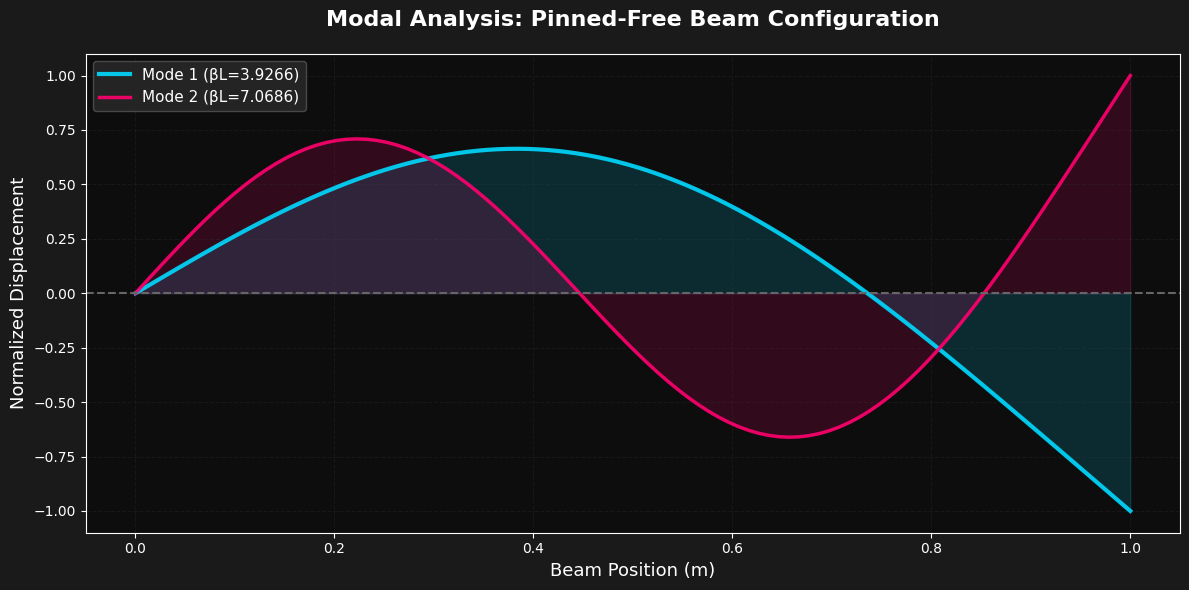

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Physical constants
L = 1.0
EI = 210e9 * 1e-6
rhoA = 7.8
C = 0.5

# Characteristic equation
def characteristic_eq(betaL):
    return np.tan(betaL) - np.tanh(betaL)

# Find roots
roots = []
guesses = [3.9, 7.0]

for guess in guesses:
    root = fsolve(characteristic_eq, guess)[0]
    roots.append(root)

beta_vals = np.array(roots) / L
omega_vals = (beta_vals**2) * np.sqrt(EI / rhoA)

print(f"First Mode: beta1*L = {roots[0]:.4f}, omega1 = {omega_vals[0]:.2f} rad/s")
print(f"Second Mode: beta2*L = {roots[1]:.4f}, omega2 = {omega_vals[1]:.2f} rad/s")

# Mode shapes
def phi_n(x, beta, L):
    ratio = np.sin(beta*L) / np.sinh(beta*L)
    return np.sin(beta*x) + ratio * np.sinh(beta*x)

# Enhanced plotting with dark theme
x_vals = np.linspace(0, L, 100)

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6), facecolor='#1a1a1a')
ax.set_facecolor('#0d0d0d')

colors = ['#00d9ff', '#ff006e']  # Cyan and Pink
linewidths = [3, 2.5]

for i, beta in enumerate(beta_vals):
    y_mode = phi_n(x_vals, beta, L)
    y_mode /= np.max(np.abs(y_mode))
    ax.plot(x_vals, y_mode, color=colors[i], linewidth=linewidths[i],
            label=f'Mode {i+1} (βL={roots[i]:.4f})', alpha=0.9)

    # Add filled area under curve
    ax.fill_between(x_vals, 0, y_mode, color=colors[i], alpha=0.15)

ax.set_title('Modal Analysis: Pinned-Free Beam Configuration',
             fontsize=16, fontweight='bold', color='white', pad=20)
ax.set_xlabel('Beam Position (m)', fontsize=13, color='white')
ax.set_ylabel('Normalized Displacement', fontsize=13, color='white')
ax.axhline(0, color='#666666', linewidth=1.5, linestyle='--')
ax.legend(fontsize=11, framealpha=0.8, facecolor='#2a2a2a', edgecolor='#555555')
ax.grid(True, alpha=0.2, linestyle='--', color='#444444')
ax.tick_params(colors='white', labelsize=10)

plt.tight_layout()
plt.show()

### **9. Numerical Evaluation of Eigenvalues ($\beta_n L$)**

To bridge from the infinite-dimensional operator $H$ to a workable **2-degree-of-freedom (2DOF)** model, solving the transcendental characteristic equation from Pinned-Free boundary conditions is essential:

$$\sin(\beta L)\cosh(\beta L) - \sinh(\beta L)\cos(\beta L) = 0$$

Given the nonlinear character of this equation, we adopt a numerical strategy. A continuous function $h(s)$ is defined with $s = \beta L$:

$$h(s) = \sin(s)\cosh(s) - \sinh(s)\cos(s)$$

#### **Python Implementation for Root Finding**
The following implementation assesses $h(s)$ over a refined grid to detect where the function changes sign, then leverages **Brent's Method** to isolate the initial two roots with high accuracy.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq

def characteristic_function(s):
    """Characteristic equation: sin(s)cosh(s) - sinh(s)cos(s) = 0"""
    return np.sin(s) * np.cosh(s) - np.sinh(s) * np.cos(s)

def find_eigenvalues(num_roots=2, search_range=(1e-6, 15.0), grid_points=5000):
    """Find first n eigenvalues using Brent's method"""
    eigenvalues = []
    grid = np.linspace(search_range[0], search_range[1], grid_points)

    for idx in range(len(grid) - 1):
        left, right = grid[idx], grid[idx + 1]

        if characteristic_function(left) * characteristic_function(right) < 0:
            eigenvalue = brentq(characteristic_function, left, right)

            if len(eigenvalues) == 0 or abs(eigenvalue - eigenvalues[-1]) > 1e-4:
                eigenvalues.append(eigenvalue)

        if len(eigenvalues) >= num_roots:
            break

    return np.array(eigenvalues)

# Physical parameters
L = 1.0

# Compute eigenvalues
beta_L = find_eigenvalues()

# Display results
print(f"Root 1 (beta_1*L): {beta_L[0]:.6f}")
print(f"Root 2 (beta_2*L): {beta_L[1]:.6f}")

Root 1 (beta_1*L): 3.926602
Root 2 (beta_2*L): 7.068583
